# 5장. 서포트 벡터 머신

## 5.1 선형 SVM 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()

X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"]==2).astype(np.float64) # Iris-Virginica면 1, 아니면 0

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0.5, 1.0, 'feature scatter')

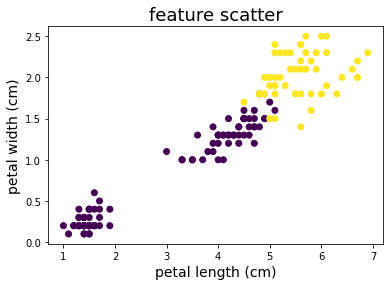

In [5]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("petal length (cm)", fontsize=14)
plt.ylabel("petal width (cm)", fontsize=14)
plt.title("feature scatter", fontsize=18)

In [6]:
# pipeline 생성
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=500000))
])

In [7]:
# model fitting
svm_clf.fit(X,y)
print(svm_clf.named_steps["linear_svc"].coef_) # weight 벡터
print(svm_clf.named_steps["linear_svc"].intercept_) # bias

[[1.63331118 2.3878915 ]]
[-2.50519016]


In [8]:
svm_clf.predict([[3.8, 1.7]])

array([0.])

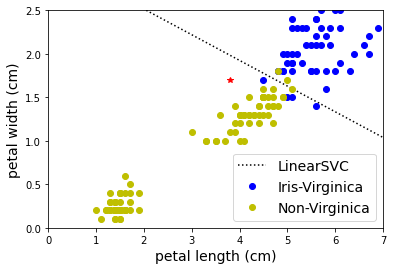

In [9]:
w = -svm_clf.named_steps["linear_svc"].coef_[0,0]/svm_clf.named_steps["linear_svc"].coef_[0,1]
b = -svm_clf.named_steps["linear_svc"].intercept_[0]/svm_clf.named_steps["linear_svc"].coef_[0,1]

line = svm_clf.named_steps["scaler"].inverse_transform([[-5, (-5*w)+b], [5, 5*w+b]]) # inverse_transform(): Scale back the data to the original representation

plt.figure()
plt.plot(line[:,0], line[:,1], "k:", label="LinearSVC") # "k:": black, 점선
plt.plot(X[:,0][y==1], X[:,1][y==1], "bo", label="Iris-Virginica")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo", label="Non-Virginica")
plt.plot(3.8, 1.7, "r*")

plt.xlabel("petal length (cm)", fontsize=14)
plt.ylabel("petal width (cm)", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([0, 7, 0, 2.5])
plt.show()

## 5.2 비선형 SVM 분류

#### (1) 다항식 특성을 추가

In [10]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=500000)) # C 값 조절(1, 100)
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=500000))])

#### (2) 커널 트릭 사용

In [11]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

#### (3) 유사도 특성 사용

가우시안 RBF 커널

In [12]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])